In [3]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

# Tweets Understanding

In [4]:
tweets = pd.read_csv('tweets.csv')

In [ ]:
tweets.info()

## Counting NaN Values

In [ ]:
tweets.isna().sum()

## Counting not numeric values

In [ ]:
tweets['retweet_count'].unique()

In [ ]:
tweets['favorite_count'].unique()

In [ ]:
tweets['num_hashtags'].unique()

In [ ]:
tweets['num_mentions'].unique()

In [ ]:
tweets['reply_count'].unique()

In [ ]:
tweets['num_urls'].unique()

## Counting duplicates

In [5]:
tweets.duplicated().sum()

1952099

Check if there are some 'id' duplicated

In [6]:
tweets['id'].duplicated().sum()

1992560

## Searching for invalid timestamp

In [ ]:
tweets.sort_values('created_at')

## Data Visualization

In [ ]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

In [ ]:
fig = plt.figure(figsize=(20,23))
fig_dims = (3,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
tweets['retweet_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Retweet Count')
plt.yscale('log')


###fig 2
plt.subplot2grid(fig_dims, (0,1))
tweets['reply_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Reply Count')
plt.yscale('log')

###fig 3
plt.subplot2grid(fig_dims, (1,0))
tweets['favorite_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Favorite Count')
plt.yscale('log')

###fig 4
plt.subplot2grid(fig_dims, (1,1))
tweets['num_hashtags'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Hashtags')
plt.yscale('log')

###fig 5
plt.subplot2grid(fig_dims, (2,0))
tweets['num_mentions'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Mentions')
plt.yscale('log')

###fig 6
plt.subplot2grid(fig_dims, (2,1))
tweets['num_urls'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Urls')
plt.yscale('log')


plt.show()

## Outlier Analysis

In [ ]:
tweets.boxplot(column=['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_mentions', 'num_urls'])
plt.yscale('log')

# User Understanding

In [ ]:
users = pd.read_csv('users.csv')

In [ ]:
users.info()
users.dtypes

## Counting NaN Values

In [ ]:
users.isna().sum()

## Counting Duplicates

In [ ]:
users.duplicated().sum()

## Searching for invalid language

In [ ]:
users['lang'].unique()

In [ ]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

## Searching for invalid values in bot

In [ ]:
users['bot'].unique()

## Searching for invalid created_at values

In [81]:
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')
users[users['created_at'] > datetime.now()]['created_at'].count()

0

In [82]:
users[users['created_at'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]['created_at'].count()

0

## Counting not numeric values in statuses_count

In [78]:
users['statuses_count'].unique()

array([7.6000e+01, 5.4000e+01, 3.0000e+00, ..., 1.1688e+04, 3.0240e+03,
       5.2790e+03])

# Data Visualization

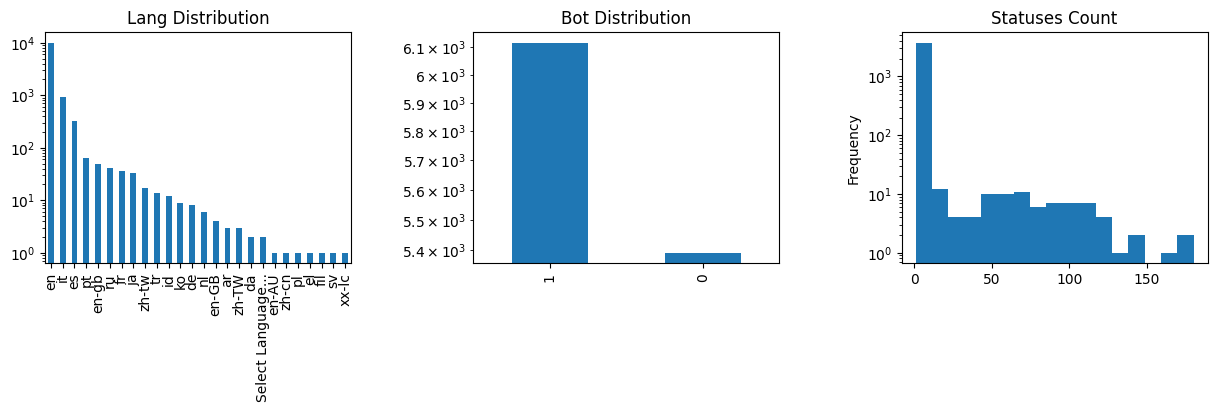

In [90]:
fig = plt.figure(figsize=(15, 3))
fig_dims = (1,3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
users['lang'].value_counts().plot.bar(logy=True, title='Lang Distribution')
plt.yscale('log')


###fig 2
plt.subplot2grid(fig_dims, (0,1))
users['bot'].value_counts().plot.bar(title='Bot Distribution')
plt.yscale('log')

###fig 3
plt.subplot2grid(fig_dims, (0,2))
users['statuses_count'].value_counts().plot.hist(bins=round(math.log2(users.size) + 1), logy=True, title='Statuses Count')
plt.yscale('log')

## Outlier Analysis

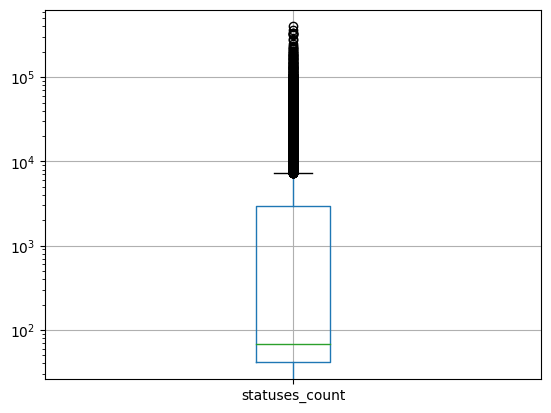

In [92]:
users.boxplot(column=['statuses_count'])
plt.yscale('log')